<a href="https://colab.research.google.com/github/bahargholami20035/Heart-Disease-Predictor/blob/main/heart_disease_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


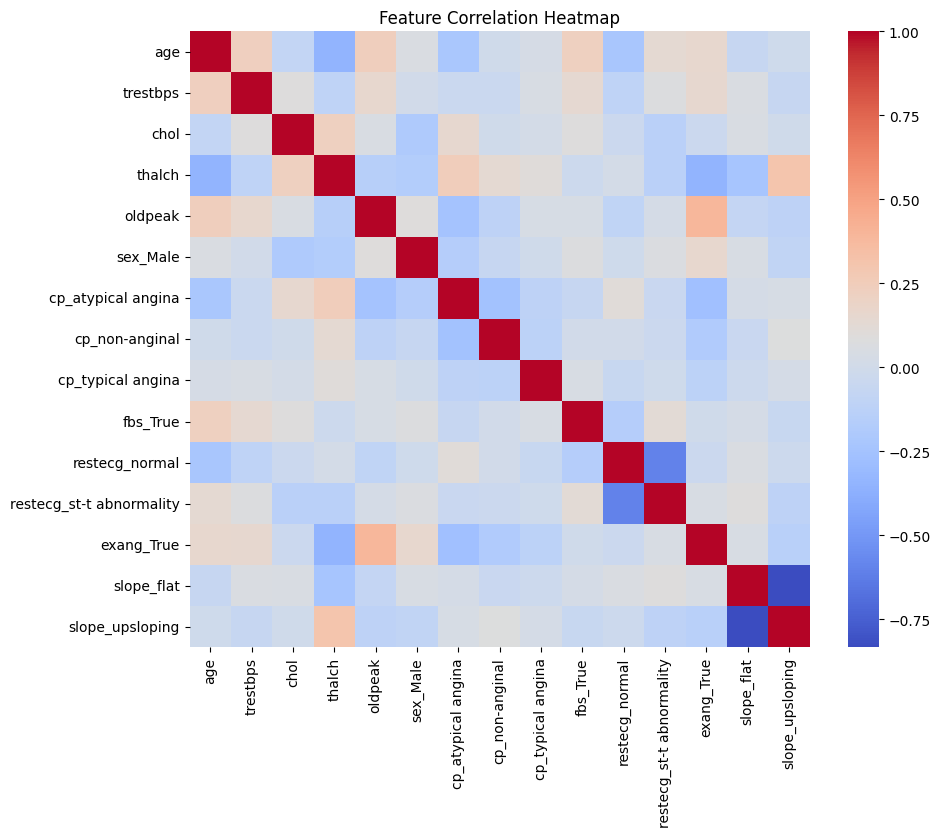

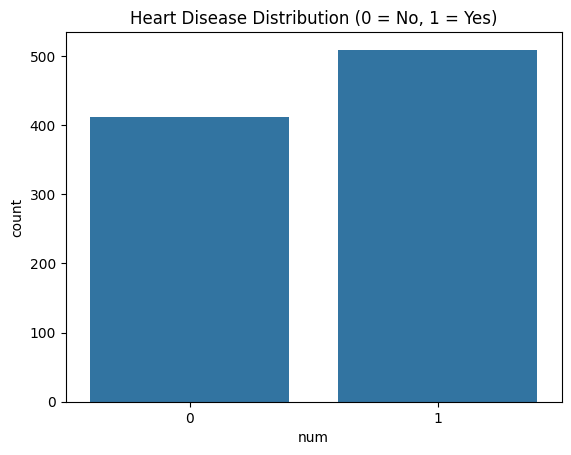


Logistic Regression Cross-Validation Accuracy: 0.7989244346387203
Logistic Regression Test Results:
Accuracy: 0.8043478260869565
Precision: 0.8411214953271028
Recall: 0.8256880733944955


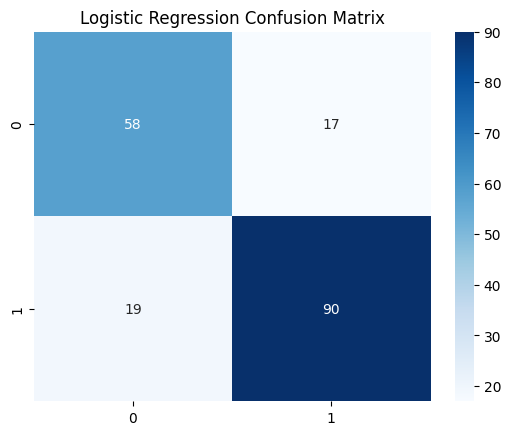


Decision Tree Cross-Validation Accuracy: 0.7568302996874425
Decision Tree Test Results:
Accuracy: 0.7989130434782609
Precision: 0.86
Recall: 0.7889908256880734


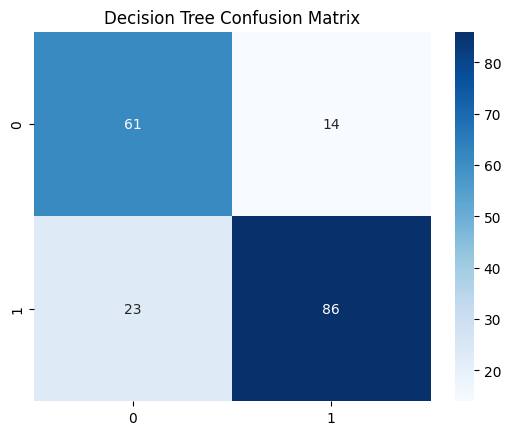


Feature Importance (Decision Tree):
exang_True            0.356092
chol                  0.201530
oldpeak               0.119568
sex_Male              0.096745
thalch                0.066990
cp_atypical angina    0.062910
slope_flat            0.028050
trestbps              0.019959
cp_non-anginal        0.016973
cp_typical angina     0.016485
dtype: float64


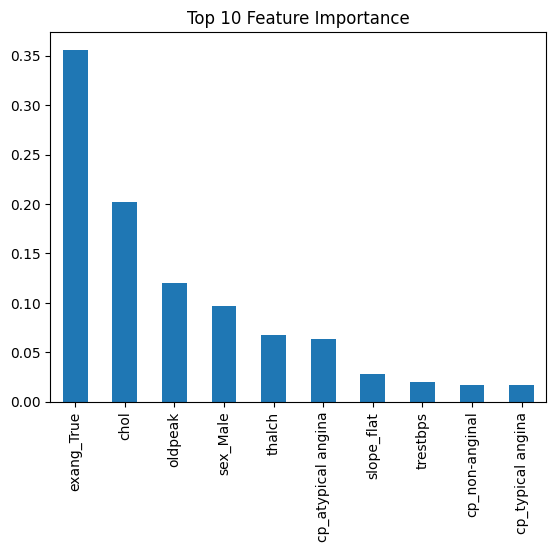


This model supports healthcare analytics by predicting heart disease risk, aiding early diagnosis.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load dataset (adjust path as needed)
data = pd.read_csv('heart_disease_uci.csv')

# --- Data Preprocessing ---
print("Missing values:\n", data.isnull().sum())

# Drop rows with missing target ('num')
data = data.dropna(subset=['num'])

# Define feature columns (dropping 'ca' and 'thal' due to excessive missing values)
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope']
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

# Impute missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

# Convert target to binary (0 = no disease, 1 = disease)
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Prepare features and target
X = data[features]
y = data['num']

# Encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# --- Exploratory Data Analysis (EDA) ---
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Target distribution
sns.countplot(x='num', data=data)
plt.title('Heart Disease Distribution (0 = No, 1 = Yes)')
plt.show()

# --- Data Splitting and Scaling ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model 1: Logistic Regression (Tuned) ---
log_reg = LogisticRegression(C=0.1, max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Cross-validation
log_cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nLogistic Regression Cross-Validation Accuracy:", log_cv_scores.mean())

# Evaluation
print("Logistic Regression Test Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# --- Model 2: Decision Tree (Tuned) ---
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)  # No scaling needed
y_pred_dt = dt.predict(X_test)

# Cross-validation
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
print("\nDecision Tree Cross-Validation Accuracy:", dt_cv_scores.mean())

# Evaluation
print("Decision Tree Test Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# --- Feature Importance (Decision Tree) ---
feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance (Decision Tree):")
print(feature_importance.head(10))

# Bar plot of feature importance
feature_importance.head(10).plot(kind='bar', title='Top 10 Feature Importance')
plt.show()

# --- Real-World Relevance ---
print("\nThis model supports healthcare analytics by predicting heart disease risk, aiding early diagnosis.")